In [95]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [96]:
# opening the file in read mode 
my_file = open("names.txt", "r") 
# reading the file 
data = my_file.read()
# split the names into a list
name_list = data.split('\n')

# Let's build a bigram model

We will start by extracting all combinations of two letters in the text

In [9]:
name_list = ["%"+x.lower()+"." for x in name_list]

In [10]:
two_letter_combinations = [name[i:i+2] for name in name_list for i in range(len(name) - 1)]

In [11]:
two_letter_counts = Counter(two_letter_combinations)

In [67]:
unique_chars = sorted(set(("".join(name_list))))
char_to_index = {char: index for index, char in enumerate(unique_chars)}
index_to_char = {index: char for index, char in enumerate(unique_chars)}
N = len(unique_chars)

In [19]:
counts_array = np.zeros((N, N), dtype=int)
# Filling the counts array
for combination, count in two_letter_counts.items():
    row = char_to_index[combination[0]]
    col = char_to_index[combination[1]]
    counts_array[row, col] = count

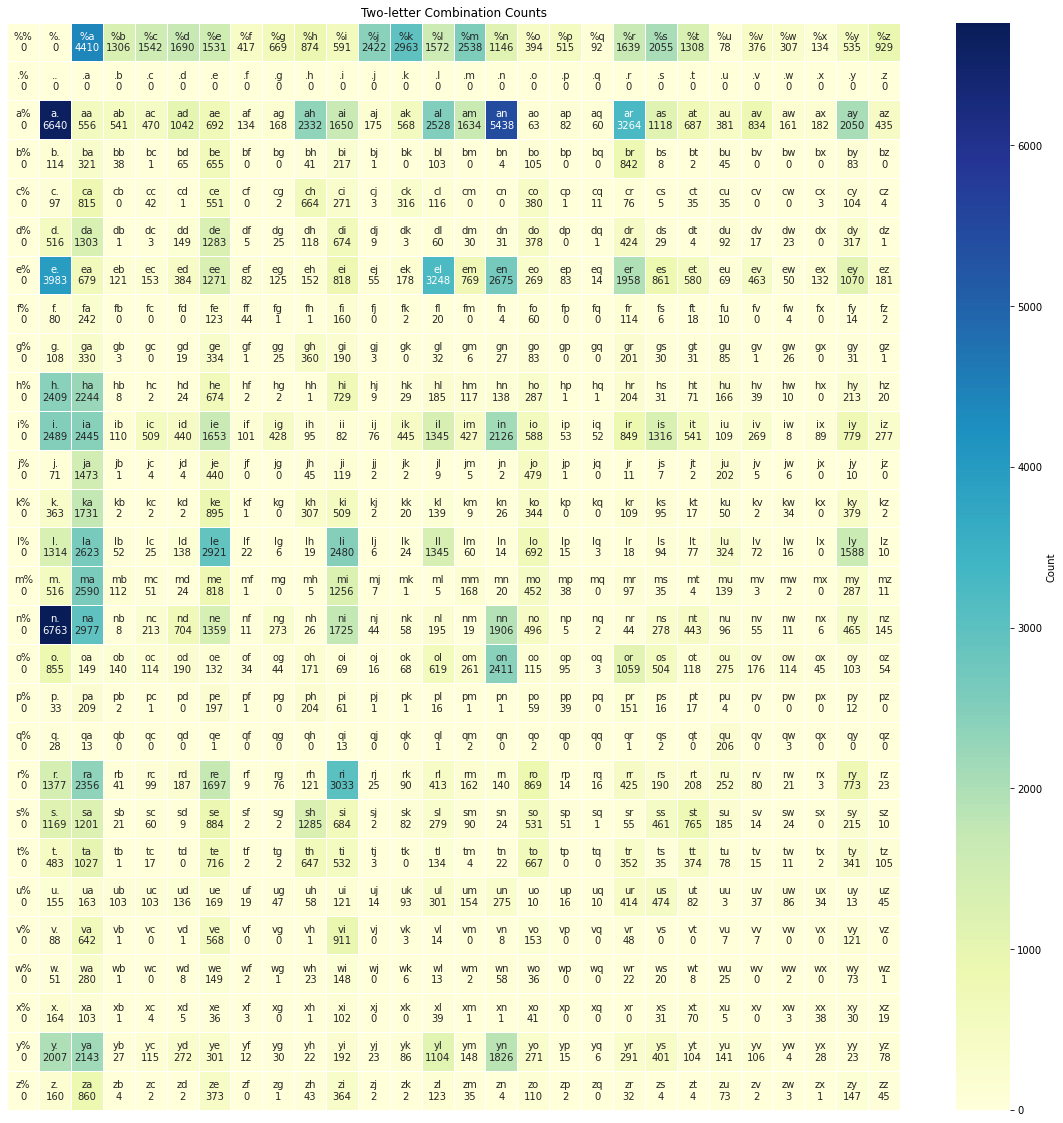

In [20]:
annotated_array = np.empty(counts_array.shape, dtype=object)
for i in range(counts_array.shape[0]):
    for j in range(counts_array.shape[1]):
        annotated_array[i, j] = f"{unique_chars[i]}{unique_chars[j]}\n{counts_array[i, j]}"

# Plotting the heatmap with annotated array
plt.figure(figsize=(20, 20))
ax = sns.heatmap(counts_array, annot=annotated_array, fmt="", cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Count'})
plt.title('Two-letter Combination Counts')
plt.xticks([])  # Remove x-axis labels
plt.yticks([])  # Remove y-axis labels
plt.show()

Great, we have all letter combinations. We'd like the model to now start doing some random sampling. Before we do that, let's turn the above array data into probability distributions. This can be achieved by dividing all numbers by the sum of the row. We will also add a smoothing parameter.

In [46]:
bigram_distributions = counts_array / counts_array.sum(axis=1,keepdims=True)

<ipython-input-46-a39dba34ea3c>:1: RuntimeWarning: invalid value encountered in divide
  bigram_distributions = counts_array / counts_array.sum(axis=1,keepdims=True)


In [93]:
all_words = []
for i in range(10):
    sampled_word = ""
    letter = "%"
    while letter != ".":
        letter_ix = char_to_index[letter]
        sampling_distribution = bigram_distributions[letter_ix]
        #sampling_distribution = np.ones(27)/27
        sampled_index = np.random.choice(len(sampling_distribution), size=1, p=sampling_distribution)[0]
        letter = index_to_char[sampled_index]
        sampled_word+=letter
    all_words.append(sampled_word)
print(all_words)

['celdarie.', 'dyenaza.', 'ah.', 'erorliar.', 'hazasmarledycoddlinann.', 'na.', 'gada.', 'besha.', 'balynou.', 'iylen.']


These results look pretty terrible. But how bad are they really? We can verify by sampling from a uniform distribution to see how bad this is in comparison

In [94]:
all_words = []
for i in range(10):
    sampled_word = ""
    letter = "%"
    while letter != ".":
        letter_ix = char_to_index[letter]
        #sampling_distribution = bigram_distributions[letter_ix]
        sampling_distribution = np.ones(27)/27
        sampled_index = np.random.choice(len(sampling_distribution), size=1, p=sampling_distribution)[0]
        letter = index_to_char[sampled_index]
        sampled_word+=letter
    all_words.append(sampled_word)
print(all_words)

['iwk%n%megeffnwybqqenwbbrojjvk.', 'pwretvlgdromnu%rjgajjyx%dodfuan%%cvysupvoqwbulktfsreg.', '.', 'gjbjmsedvutfpdejjeuddoelcrteeu%.', 'eidaruyjldsussrxupuesqvka.', 'pqsvfp.', '.', 'f.', 'wogsncqevweuchqf%ttanlofkuqcxqemensqylbw.', 'hxvnlkg%s.']


Okay our model is not actually that bad! The concept of vowels following consonants is pretty well learned using this simple sampling approach. Let's quantify the result a bit better.